STUDENT PERFORMANCE INDICATOR

In [2]:
# Basic Import
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
df.shape

(1000, 8)

CHECK MISSING VALUES


In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

CHECK DUPLICATES

In [8]:
df.duplicated().sum()

0

In [9]:
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
# Check stats of Data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


EDA

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in 'gender' variable:      ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:      ", end=" ")
print(df['race/ethnicity'].unique)

print("Categories in 'parental_level_of_education' variable:      ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:    ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ",end=" ")
print(df['test preparation course'].unique())



Categories in 'gender' variable:       ['female' 'male']
Categories in 'race_ethnicity' variable:       <bound method Series.unique of 0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race/ethnicity, Length: 1000, dtype: object>
Categories in 'parental_level_of_education' variable:       ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']


In [14]:
# Define numerical and Categorical values
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


ADDING COLUMNS FOR TOTAL SCORE AND AVERAGE

In [15]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [16]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
readinng_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full score in Maths: {math_full}')
print(f'Number of students with full score in Writing: {writing_full}')
print(f'Number of students with full score in Reading: {readinng_full}')

Number of students with full score in Maths: 7
Number of students with full score in Writing: 14
Number of students with full score in Reading: 17


In [18]:
readinng_full_20 = df[df['reading score'] <= 20]['average'].count()
writing_full_20 = df[df['writing score'] <= 20]['average'].count()
math_full_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_full_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_full_20}')
print(f'Number of students with less than 20 marks in Reading: {readinng_full_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


HISTOGRAM & KDE

<function matplotlib.pyplot.show(close=None, block=None)>

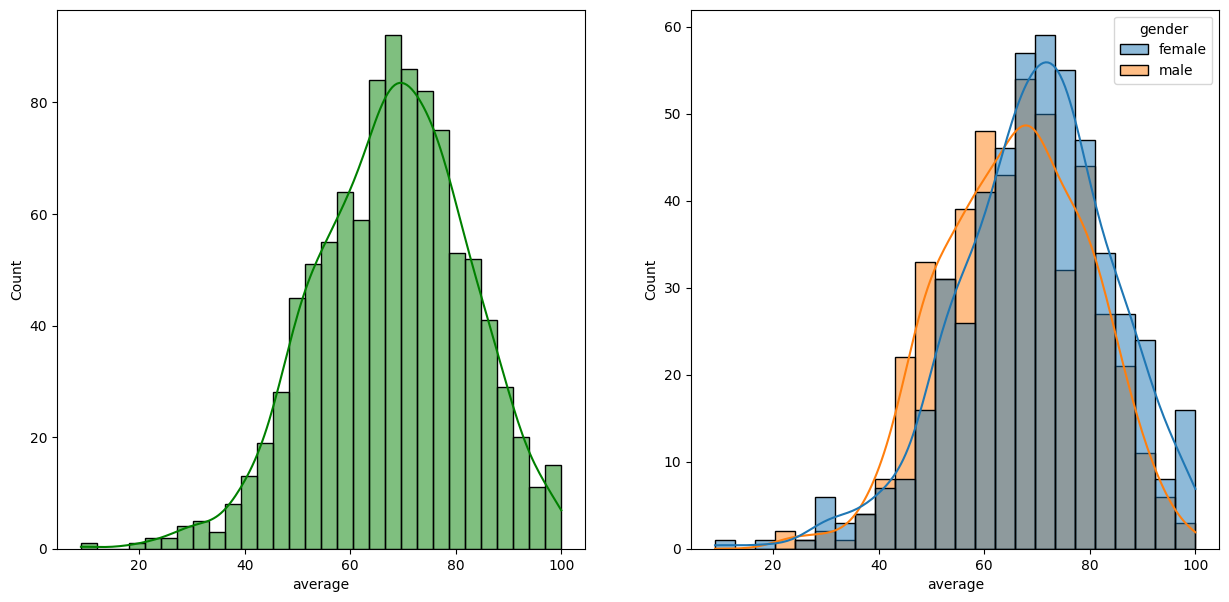

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

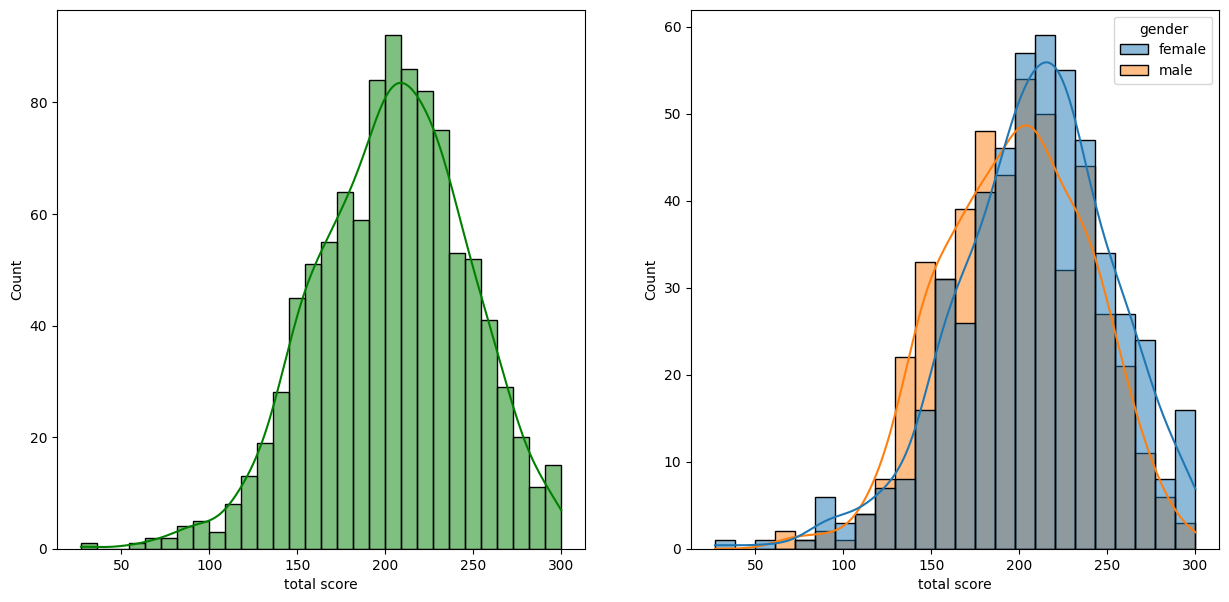

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show

INSIGHTS:
Female students tend to perform well than male students.

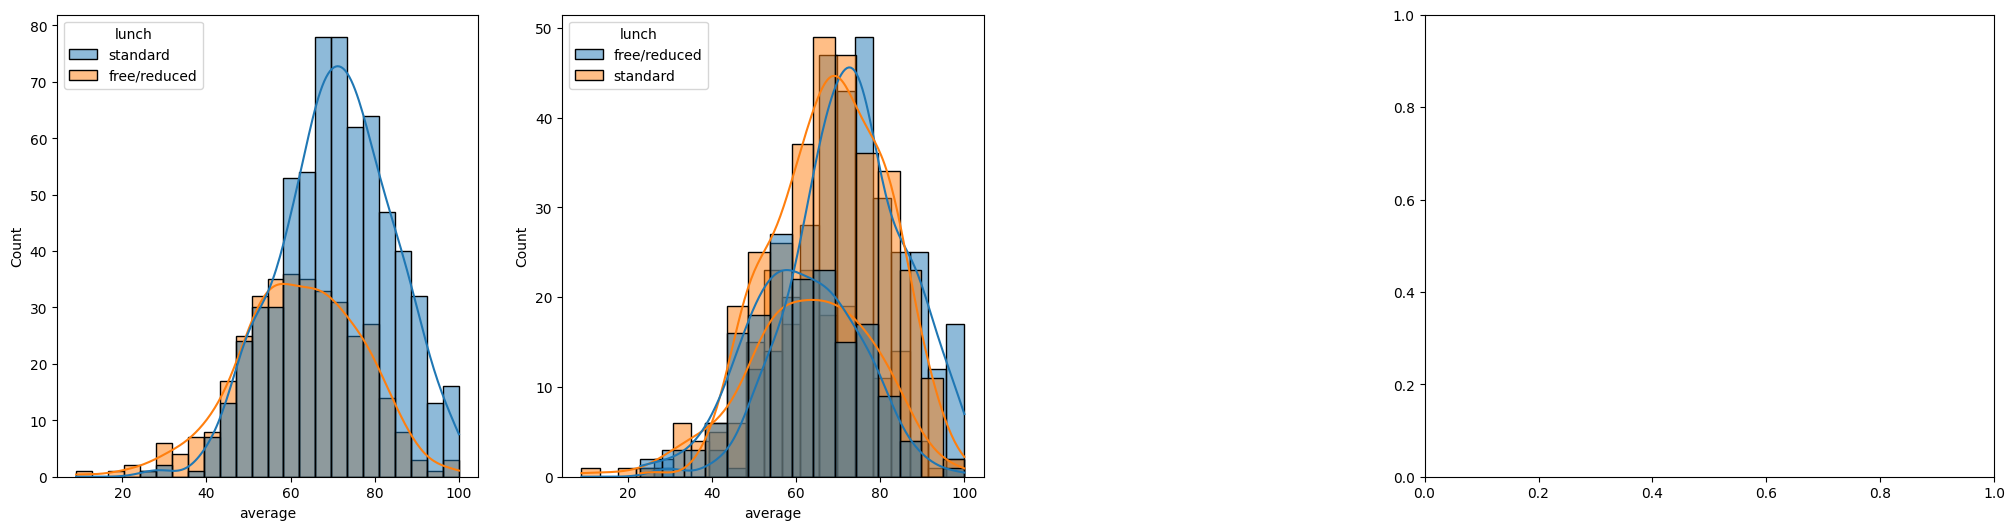

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average',kde=True,hue='lunch')
sns.histplot(data=df[df.gender=='male'], x='average',kde=True,hue='lunch')
plt.show()

In [22]:
df['gender'].nunique()

2

In [23]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x145e30e3580>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.033911133252536786, -0.5990409293541875, '48.2%')])

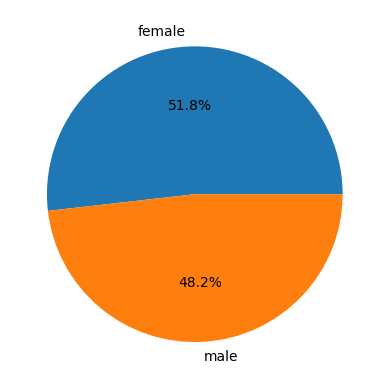

In [24]:
plt.pie(df['gender'].value_counts(),labels=df['gender'].value_counts().index, autopct="%0.1f%%")

Findings

Ratio of male:female almost 1

In [25]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

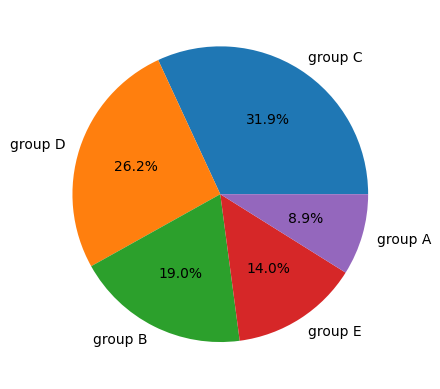

In [26]:
plt.pie(df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index, autopct="%0.1f%%")
plt.show()

Findings

Group A has least no. of students and group C has most

In [27]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

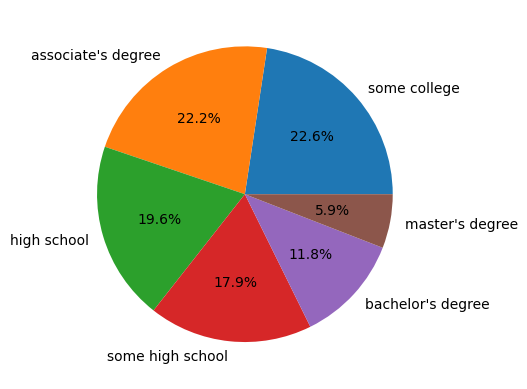

In [29]:
plt.pie(df['parental level of education'].value_counts(),labels=df['parental level of education'].value_counts().index, autopct="%0.1f%%")
plt.show()

Findings

Students whose parents have Master's degrees are the least represented, while those whose parents attended 'some college' are the most represented. This could be due to:

Potential issues with how the school collected or recorded parental educational qualifications.

The school's location, possibly in a rural area, where parental education levels might vary more widely

In [30]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

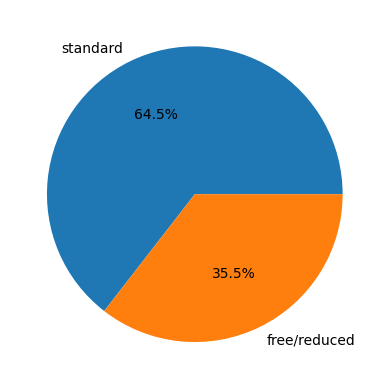

In [31]:
plt.pie(df['lunch'].value_counts(),labels=df['lunch'].value_counts().index, autopct="%0.1f%%")
plt.show()

Findings

600+ students eat standard lunch while 300+ eat free/reduced lunch.

In [32]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

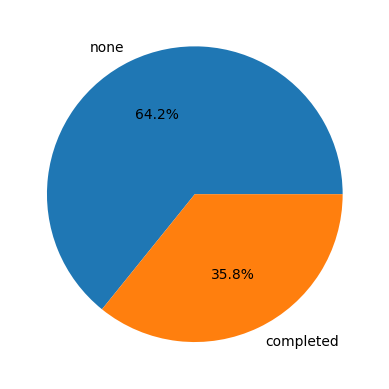

In [33]:
plt.pie(df['test preparation course'].value_counts(),labels=df['test preparation course'].value_counts().index, autopct="%0.1f%%")
plt.show

Findings

600+ students have not done test prep while 300+ have completed.

In [35]:
# MATH SCORE
df['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

In [36]:
(df['math score']==0).sum()

1

In [37]:
(df['math score']==100).sum()

7

<Axes: xlabel='math score', ylabel='Count'>

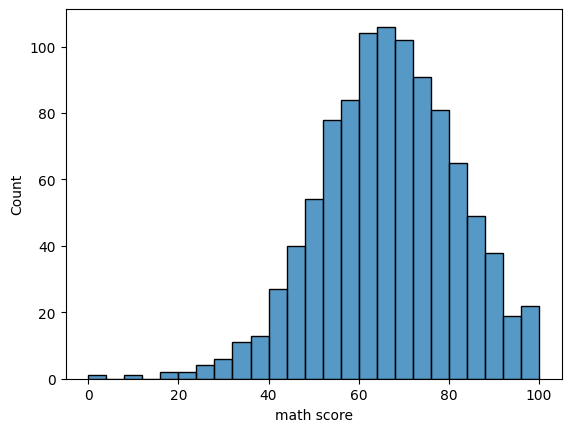

In [38]:
sns.histplot(df['math score'])

In [39]:
df['math score'].skew()

-0.27893514909431694

<Axes: xlabel='math score'>

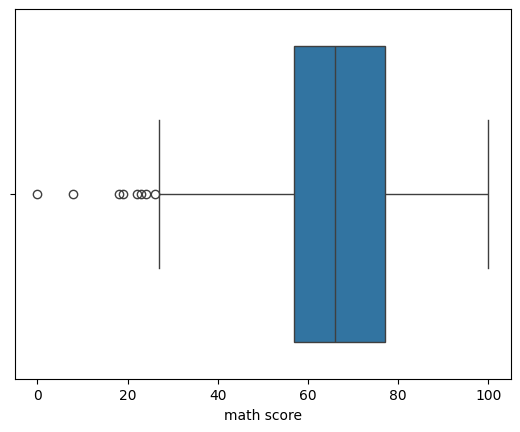

In [40]:
sns.boxplot(data=df, x = 'math score')

Findings

mean marks scored here is 66
meadian is 66
min is 0, max is 100.
1 student scored 0, 7 scored 100
data is not skewed
some outliers are there

In [42]:
# Reading score
df['reading score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

In [43]:
(df['reading score']==17).sum()

1

In [44]:
(df['reading score']==100).sum()

17

<Axes: xlabel='reading score', ylabel='Count'>

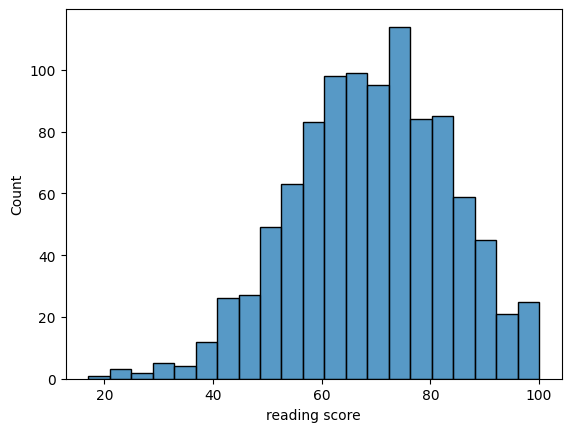

In [45]:
sns.histplot(df['reading score'])

In [46]:
df['reading score'].skew()

-0.25910451810923063

<Axes: xlabel='reading score'>

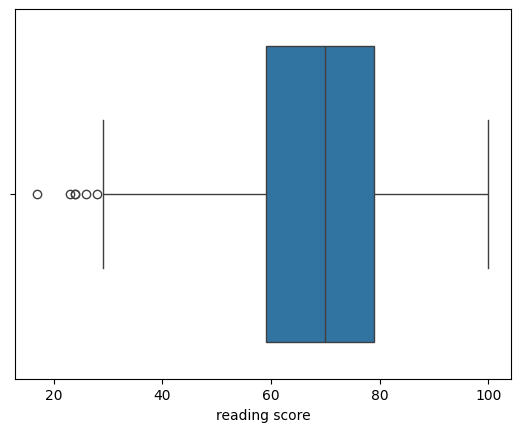

In [47]:
sns.boxplot(data = df, x = 'reading score')

In [50]:
df[df['reading score']<25]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333
596,male,group B,high school,free/reduced,none,30,24,15,69,23.000000
980,female,group B,high school,free/reduced,none,8,24,23,55,18.333333


Findings

mean marks scored here is 69
meadian is 70
min is 17, max is 100.
1 student scored 17, 17 scored 100
data is not skewed
some outliers are there

In [51]:
# Writing Score
df['writing score'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64

In [52]:
(df['writing score']==10).sum()

1

In [53]:
(df['writing score']==100).sum()

14

<Axes: xlabel='writing score', ylabel='Count'>

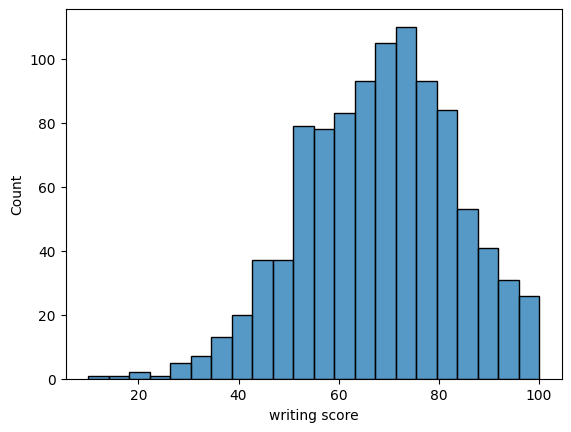

In [54]:
sns.histplot(df['writing score'])

In [55]:
df['writing score'].skew()

-0.28944397150761897

<Axes: xlabel='writing score'>

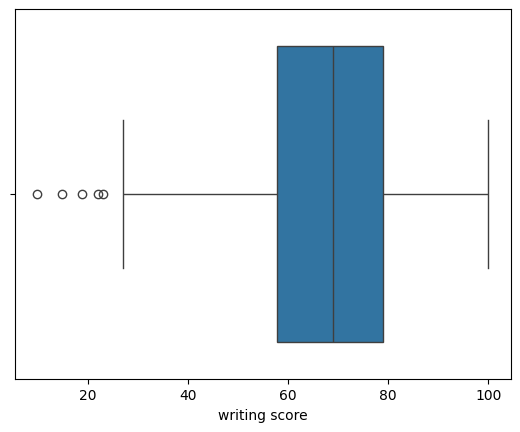

In [56]:
sns.boxplot(data = df, x = 'writing score')

In [57]:
df[df['writing score']<20]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333
596,male,group B,high school,free/reduced,none,30,24,15,69,23.000000


Findings

mean marks scored here is 68
median is 69
min is 10, max is 100.
1 student scored 10, 14 scored 100
data is not skewed
some outliers are there

Bivariate Analysis:
Relation between gender and marks scored by students


In [58]:
new_df = df.melt(id_vars=['gender'], value_vars=['math score', 'reading score', 'writing score'], var_name='score_type', value_name='score')
new_df

,gender,score_type,score
0,female,math score,72
1,female,math score,69
2,female,math score,90
3,male,math score,47
4,male,math score,76
...,...,...,...
2995,female,writing score,95
2996,male,writing score,55
2997,female,writing score,65
2998,female,writing score,77


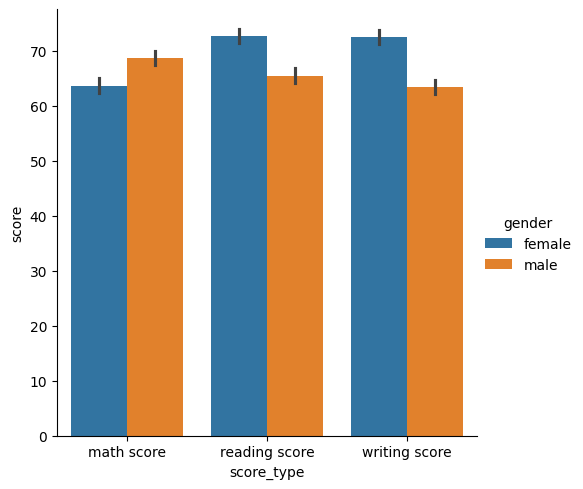

In [59]:
sns.catplot(data = new_df, x='score_type', y='score', hue='gender', kind='bar')

We can conclude that on average girls scored lesser in maths as compared to boys

Girls scored better in reading and writing.

<Axes: xlabel='race/ethnicity', ylabel='total score'>

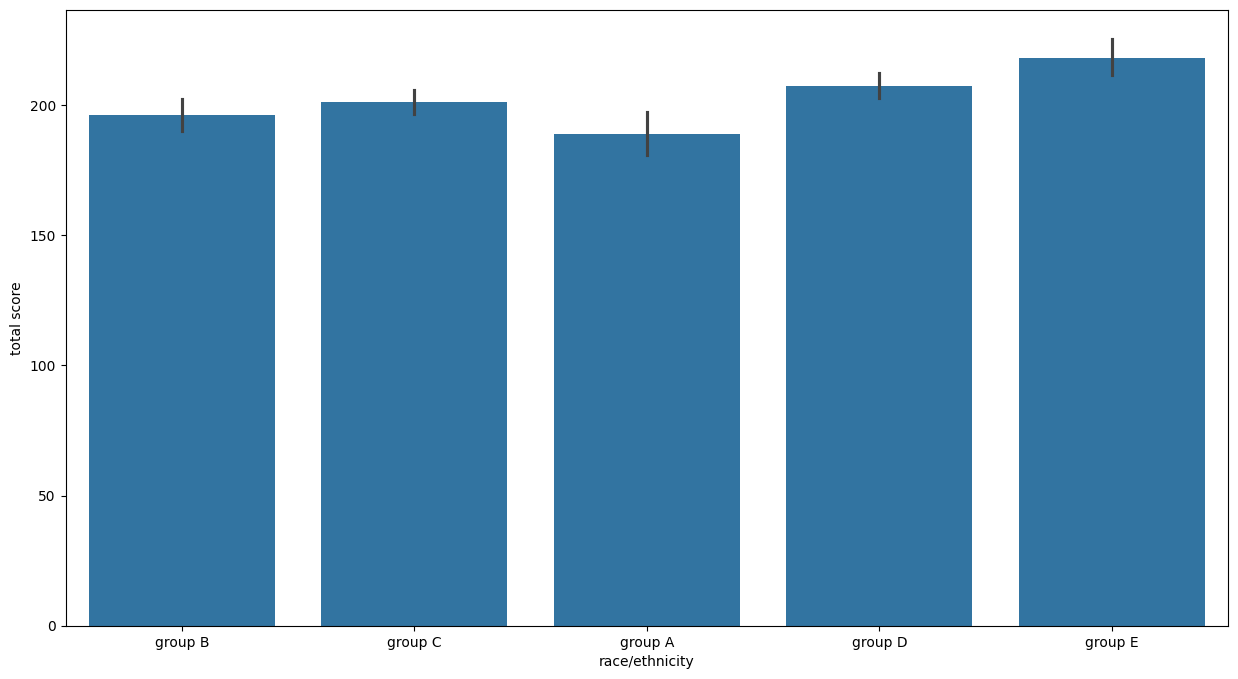

In [61]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='race/ethnicity', y='total score')

The average marks scored by students of group E is highest among all the groups while the average marks scored by students of group A is lowest.

Relation between parental level of education and test preparation course:

In [62]:
cross_tab_prop = pd.crosstab(df['parental level of education'],df['test preparation course'])
cross_tab_prop

test preparation course,completed,none
parental level of education,,
associate's degree,82,140
bachelor's degree,46,72
high school,56,140
master's degree,20,39
some college,77,149
some high school,77,102


<Axes: xlabel='parental level of education'>

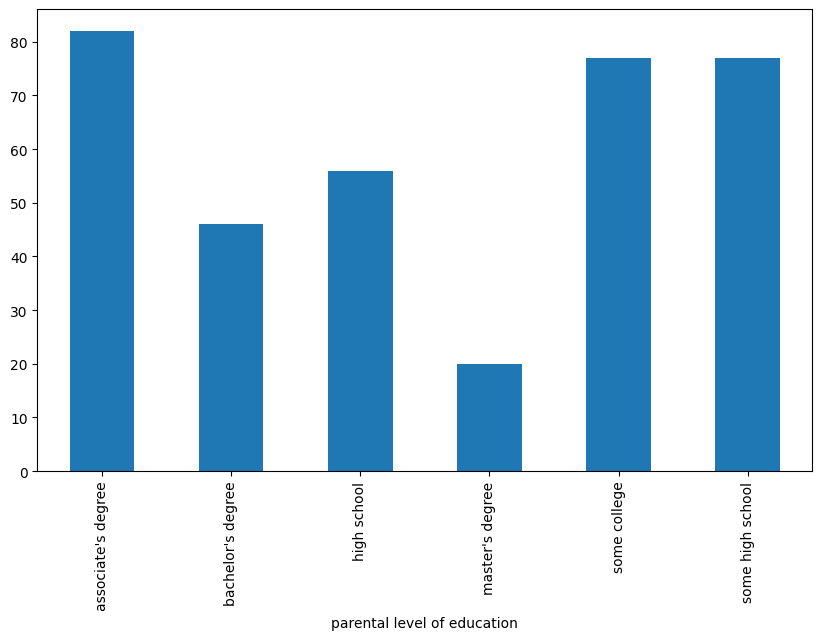

In [63]:
cross_tab_prop['completed'].plot(kind='bar',
                    colormap='tab10', 
                    figsize=(10, 6))

In [64]:
cross_tab_prop_percent = pd.crosstab(df['parental level of education'],df['test preparation course'], normalize='index')
cross_tab_prop_percent

test preparation course,completed,none
parental level of education,,
associate's degree,0.369369,0.630631
bachelor's degree,0.389831,0.610169
high school,0.285714,0.714286
master's degree,0.338983,0.661017
some college,0.340708,0.659292
some high school,0.430168,0.569832


<Axes: xlabel='parental level of education'>

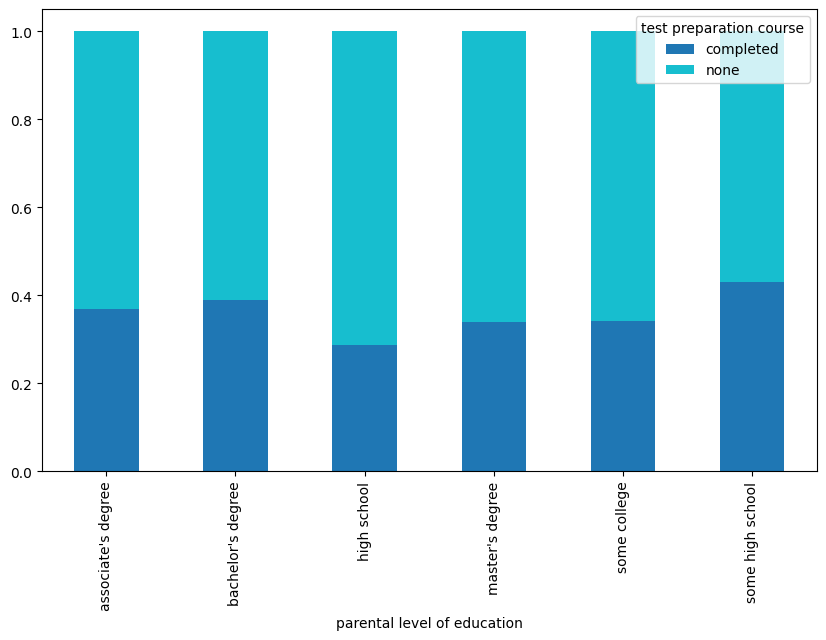

In [65]:
cross_tab_prop_percent.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

There's no clear relation between parental level of education and test preparation course.

<Axes: xlabel='parental level of education', ylabel='total score'>

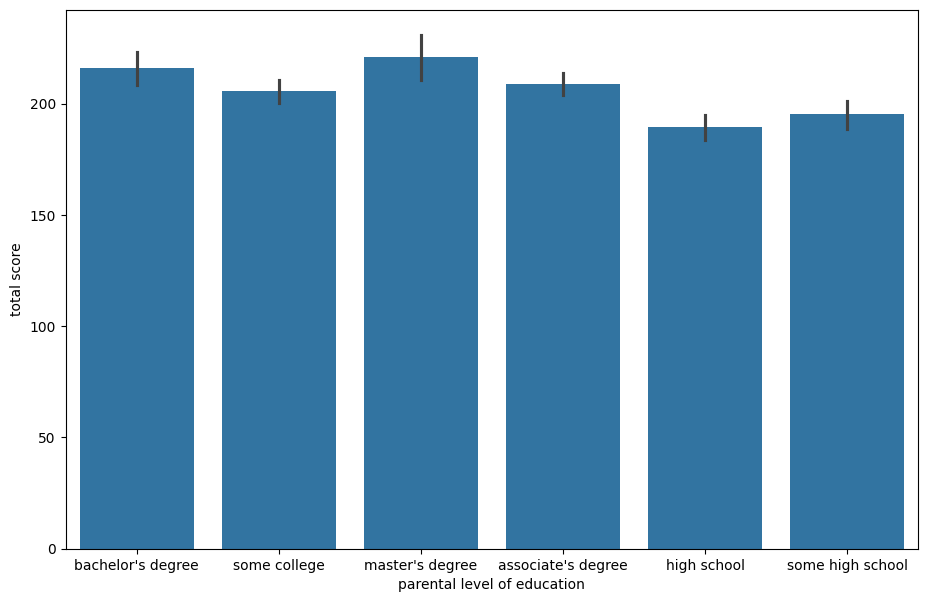

In [66]:
plt.figure(figsize=(11,7))
sns.barplot(data=df, x = 'parental level of education', y='total score')

we can see there is direct relation between how the child is performing and how educated the parents are. Average marks of students are is descending order as master's degree > bachelor's degree> associate degree > some college > some high school > high school

Relation between food eaten by students and marks scored by students:

<Axes: xlabel='total score', ylabel='Density'>

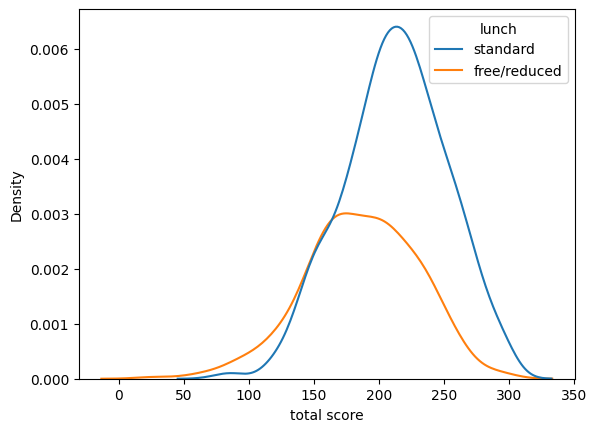

In [68]:
sns.kdeplot(data = df, x ='total score', hue='lunch')

On average student who got standard lunch performed better. so nutrition is an important factor here.

Relation between test preparation by students and marks scored by students:

<Axes: xlabel='test preparation course', ylabel='math score'>

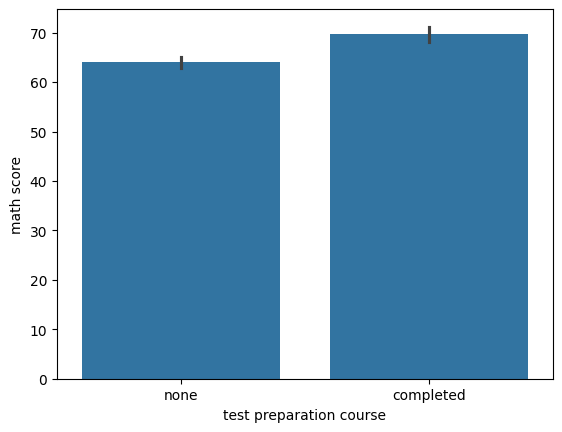

In [69]:
# Test preparation course vs math score
sns.barplot(data = df, y='math score', x='test preparation course')

<Axes: xlabel='test preparation course', ylabel='reading score'>

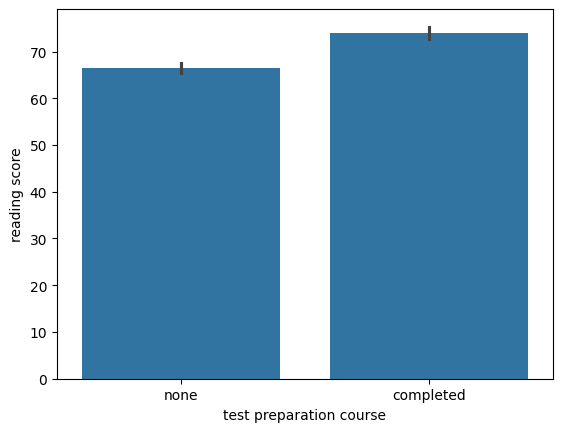

In [70]:
# Test preparation course vs reading score
sns.barplot(data = df, y='reading score', x='test preparation course')

<Axes: xlabel='test preparation course', ylabel='writing score'>

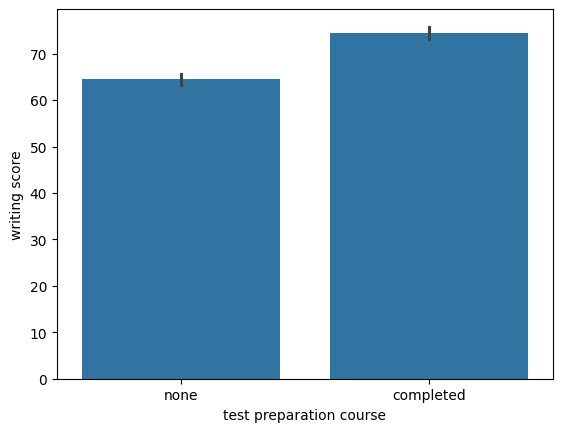

In [71]:
# Test preparation course vs writing score
sns.barplot(data = df, y='writing score', x='test preparation course')

We can see in all the three cases, on an average students who completed the test preparation course scored better marks.

<Axes: xlabel='total score', ylabel='Density'>

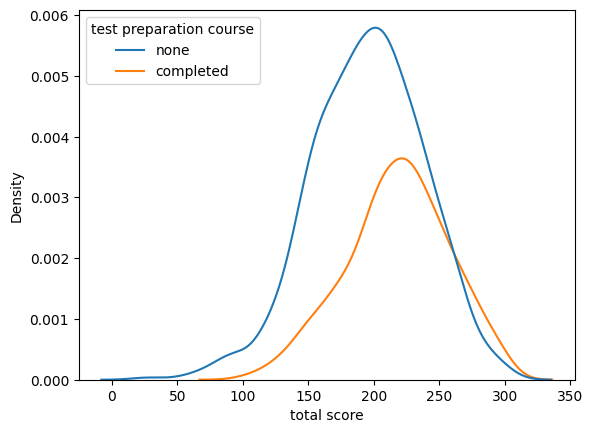

In [72]:
sns.kdeplot(data = df, x ='total score', hue='test preparation course')

On an average, students who completed the test preparation course performed better than those who didn't prepare.

SOME CONCLUSIONS DRAWN FROM THE DATA ARE AS FOLLOWS

There are more records of male students than female in the dataset.

On average, girls scored lower in math compared to boys.

Girls achieved higher scores in reading and writing on average.

Students from group E achieved the highest average marks among all groups, while students from group A scored the lowest.

There appears to be a direct correlation between students' academic performance and their parents' level of education.

On average, students who received standard lunch performed better, suggesting nutrition plays a significant role.

Students who completed the test preparation course, on average, achieved better scores compared to those who did not prepare